In [4]:
import pandas as pd
import json

# Load data from JSON files
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
#review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True)
#user_df = pd.read_json('yelp_academic_dataset_user.json', lines=True)


In [5]:
# Display the first few rows of each dataframe
print(business_df.head())
#print(review_df.head())
#print(user_df.head())

# Display summary information
print(business_df.info())
#print(review_df.info())
#print(user_df.info())


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [6]:
# Summary statistics
print(business_df.describe())
#print(review_df.describe())
#print(user_df.describe())


            latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  


In [7]:
# Check for missing values
print(business_df.isnull().sum())
#print(review_df.isnull().sum())
#print(user_df.isnull().sum())


business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


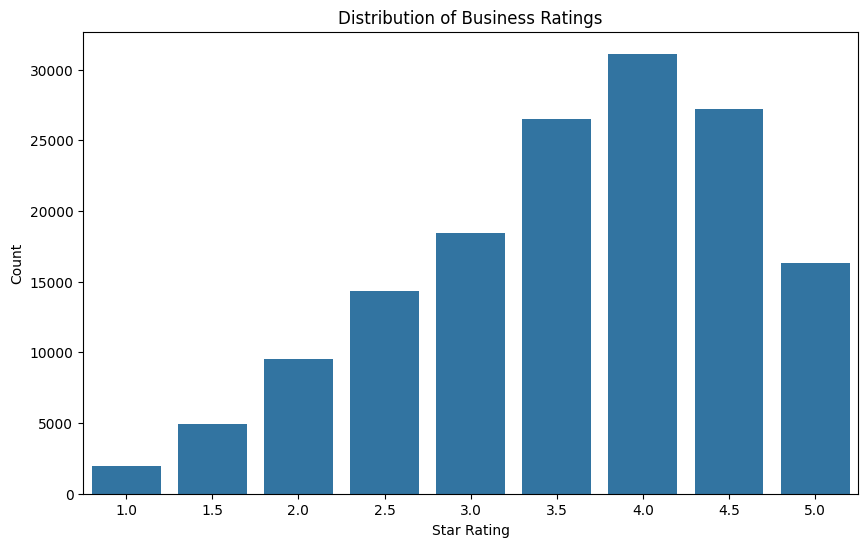

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=business_df)
plt.title('Distribution of Business Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


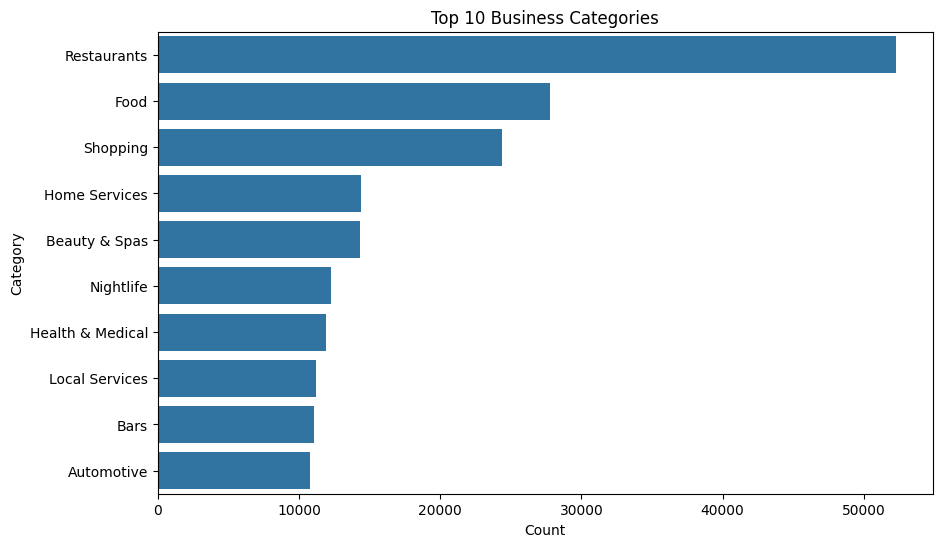

In [9]:
# Convert the 'categories' column to string type if it's not already
business_df['categories'] = business_df['categories'].astype(str)

# Split categories into a list
business_df['categories'] = business_df['categories'].str.split(', ')

# Explode the categories into separate rows
categories = business_df['categories'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=categories.values, y=categories.index)
plt.title('Top 10 Business Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

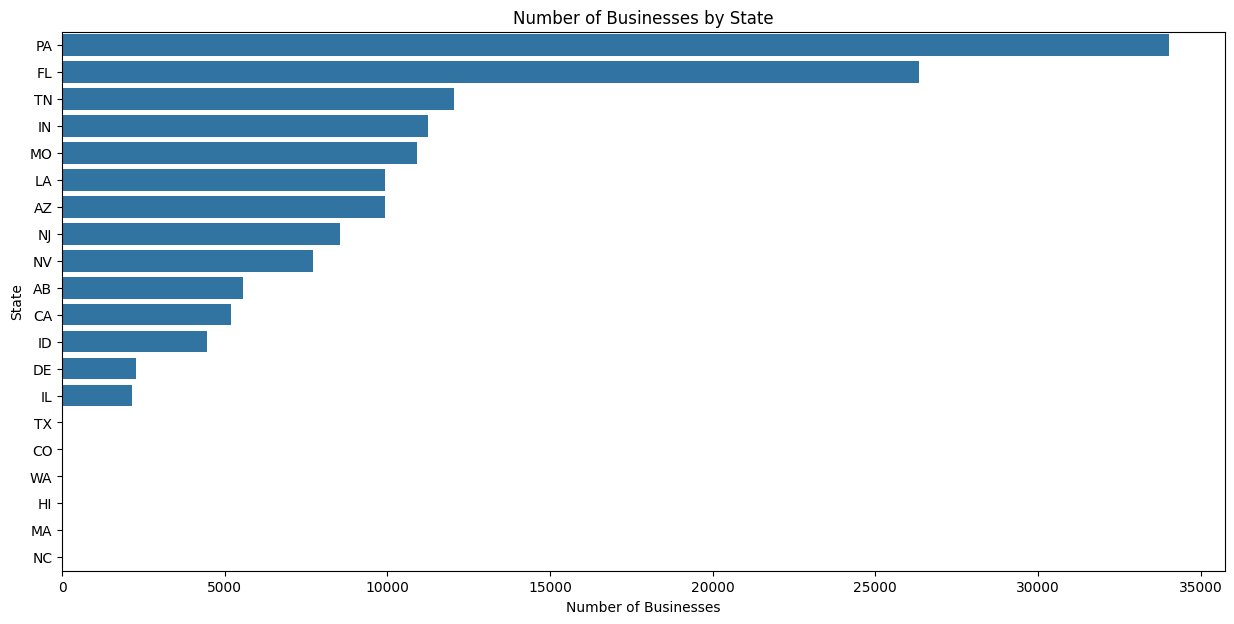

In [10]:
plt.figure(figsize=(15, 7))
state_counts = business_df['state'].value_counts().head(20)  # Top 20 states
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Number of Businesses by State')
plt.xlabel('Number of Businesses')
plt.ylabel('State')
plt.show()


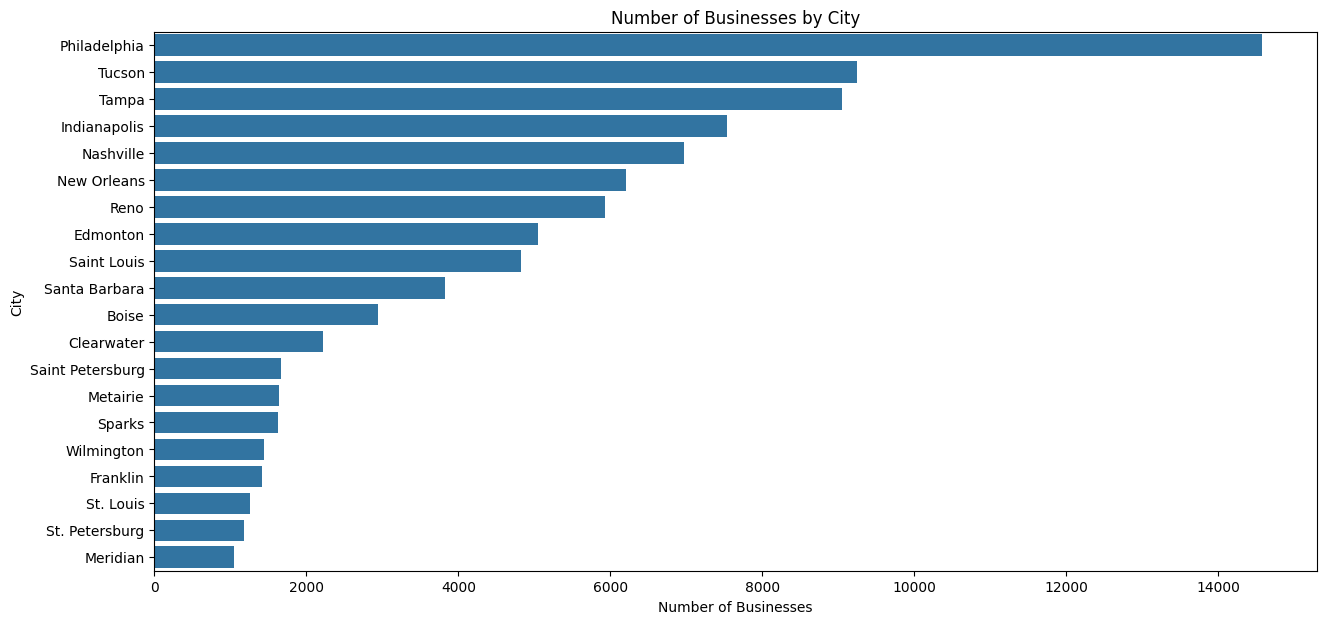

In [11]:
plt.figure(figsize=(15, 7))
city_counts = business_df['city'].value_counts().head(20)  # Top 20 cities
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Number of Businesses by City')
plt.xlabel('Number of Businesses')
plt.ylabel('City')
plt.show()


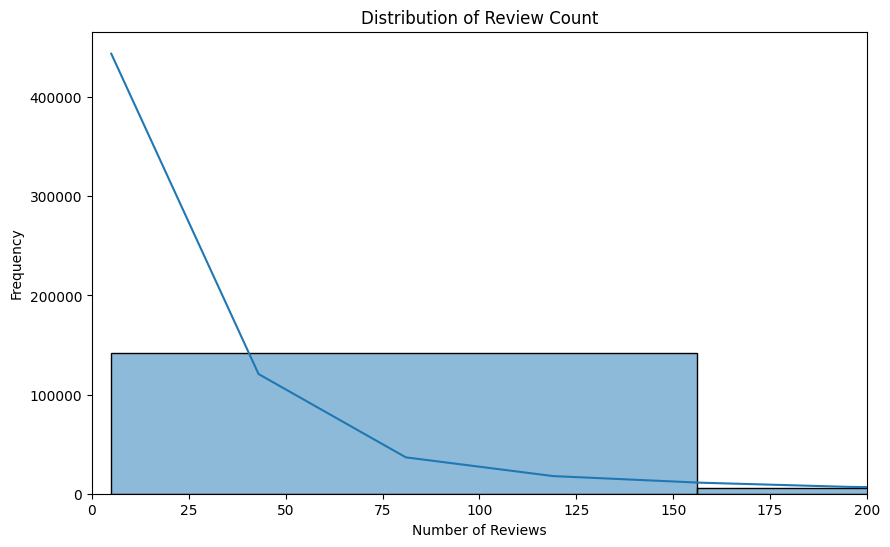

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(business_df['review_count'], bins=50, kde=True)
plt.title('Distribution of Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Limit x-axis for better visualization
plt.show()


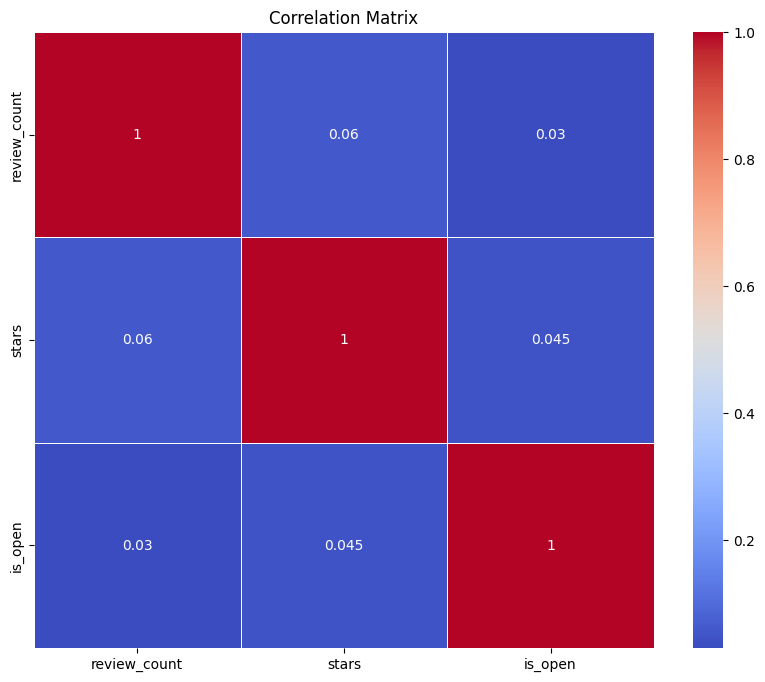

In [13]:
# Select numerical columns for correlation analysis
numerical_cols = ['review_count', 'stars', 'is_open']

# Correlation matrix
corr_matrix = business_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


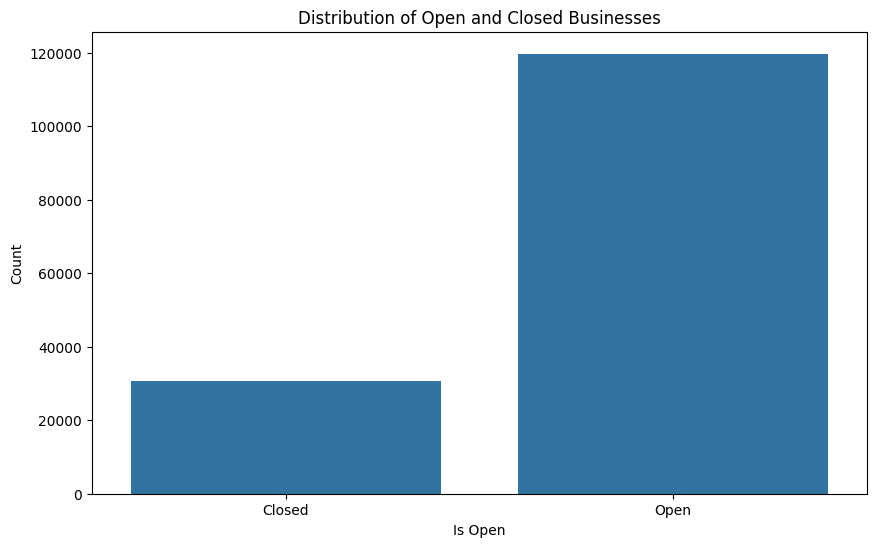

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_open', data=business_df)
plt.title('Distribution of Open and Closed Businesses')
plt.xlabel('Is Open')
plt.ylabel('Count')
plt.xticks([0, 1], ['Closed', 'Open'])
plt.show()


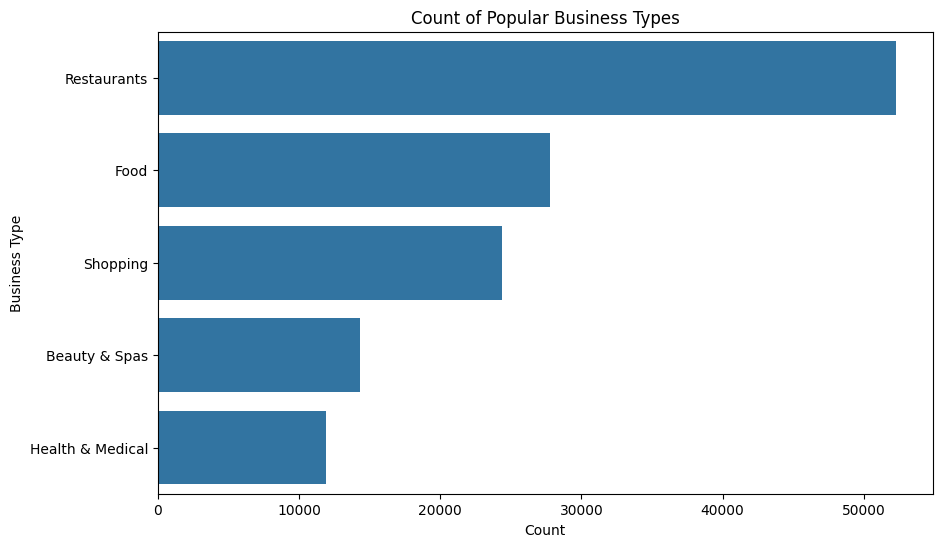

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load business data from JSON file
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

# Ensure categories column is split into lists
business_df['categories'] = business_df['categories'].str.split(', ')

# Define common attributes
common_attributes = ['Restaurants', 'Shopping', 'Food', 'Beauty & Spas', 'Health & Medical']

# Count the presence of common attributes
attribute_counts = {}
for attribute in common_attributes:
    attribute_counts[attribute] = business_df['categories'].apply(lambda x: attribute in x if isinstance(x, list) else False).sum()

attribute_counts = pd.Series(attribute_counts).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=attribute_counts.values, y=attribute_counts.index)
plt.title('Count of Popular Business Types')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()



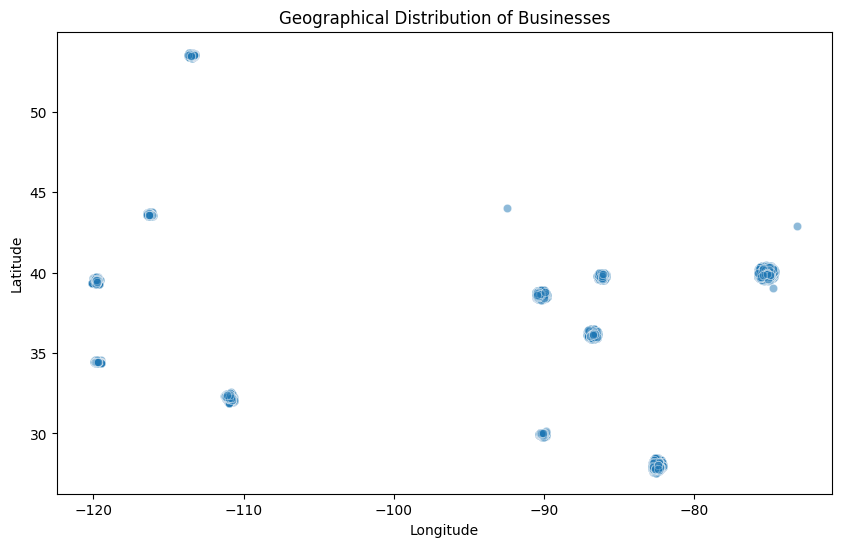

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=business_df, alpha=0.5)
plt.title('Geographical Distribution of Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
